In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Описание колонок: 
<ul>
    <li><code>PassengerId</code> - Уникальный Id для каждого пассажира. Каждый Id имеет форму gggg_pp где gggg указывает группу, с которой путешествует пассажир, а pp – это их номер в группе. Люди в группе чаще всего являются семьей, но не всегда.</li>
<li><code>HomePlanet</code> - Планета, которую покинул пассажир, обычно это планета из постоянного пребывания.</li>
<li><code>CryoSleep</code> - Указывает, решил ли пассажир быть помещенным в криосон на время рейса. Пассажиры в криосне ограничены в своих каютах.</li>
<li><code>Cabin</code> - Номер кабины, в которой остановился пассажир. Имеет форму палуба/номер/сторона, где сторона может быть P для Левого борта или S для Правого борта.</li>
<li><code>Destination</code> - Планета, на которой пассажир высаживается.</li>
<li><code>Age</code> - Возраст пассажира.</li>
<li><code>VIP</code> - Указывает, платил ли пассажир за специальные VIP услуга на время путешествия.</li>
<li><code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Сумма, которую пассажир выставил на каждый из многочисленных роскошных удобств космического корабля "Титаник".</li>
<li><code>Name</code> - Имя и фамилия пассажира.</li>
<li><code>Transported</code> - Показывает, был ли пассажир транспортирован в другое измерение. Это целевая переменная, колонка, которую вы пытаетесь предсказать.</li>
</ul>

In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Имеем 14 колонок, 7 из которых типа object, 6 типа float и одна целевая переменная типа bool.
По хеду датасета строкой выше видно, что все числа в колонках с типом float по сути целочисленные. 
<p>Проверим так ли это.</p>


In [6]:
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    print('Колонка {0}: \t{1}'.format(col, train_data[col].apply(float.is_integer).all()))

Колонка Age: 	False
Колонка RoomService: 	False
Колонка FoodCourt: 	False
Колонка ShoppingMall: 	False
Колонка Spa: 	False
Колонка VRDeck: 	False


Нет, к сожалению, не так...

В выводе функции info() было видно, что в некоторых колонках имеются пропущенные значения. Проверим, насколько много в процентном соотношении пропущенных элементов

In [7]:
(train_data.isna().sum() / train_data.shape[0]) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Все не так плохо, всего примерно по 2% пропущенных значений в каждой из колонок кроме разве что в колонки с ID пассажира и целевой переменной.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
print('Транспортировано: ', train_data[train_data['Transported'] == True].shape[0])
print('Не транспортировано: ', train_data[train_data['Transported'] == False].shape[0])

Транспортировано:  4378
Не транспортировано:  4315


<AxesSubplot:xlabel='Transported', ylabel='Age'>

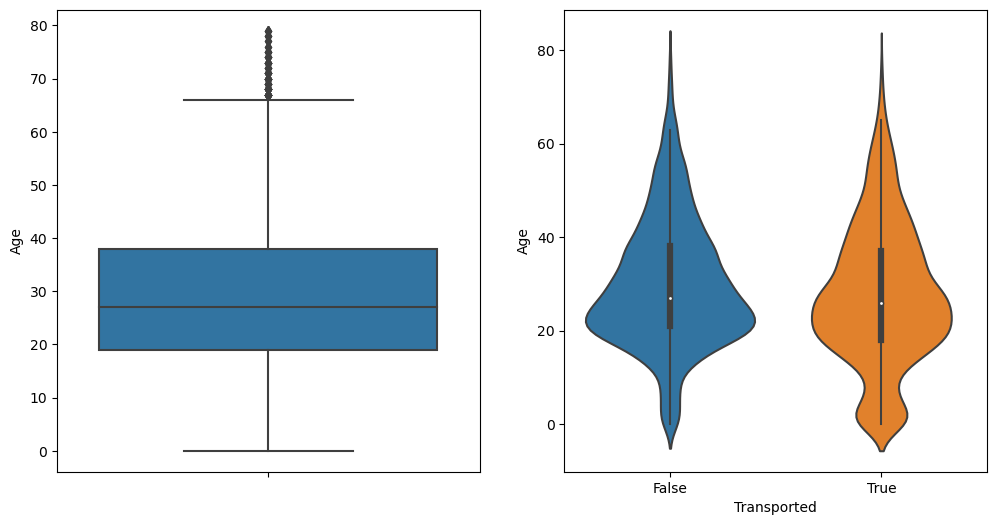

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(ax=axes[0], data=train_data, y='Age')
sns.violinplot(ax=axes[1], data=train_data, x='Transported', y='Age')

In [10]:
train_data.PassengerId.nunique() / train_data.shape[0]

1.0

Спящие и траспортированные: 2483, неспящие и нетранспортированные: 3650


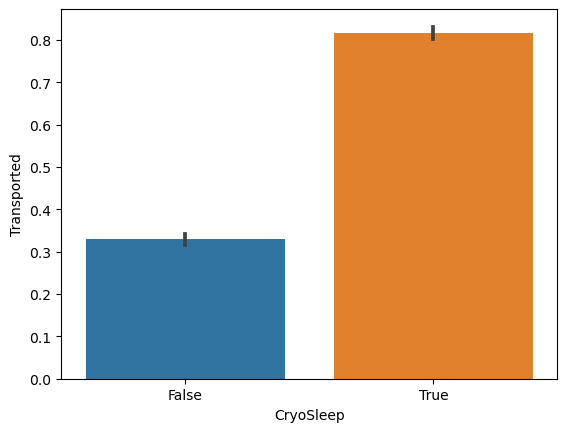

In [50]:
sns.barplot(train_data, x='CryoSleep', y='Transported')
print('Спящие и траспортированные: {0}, неспящие и нетранспортированные: {1}'.format(train_data[(train_data.CryoSleep == True) & (train_data.Transported == True)].shape[0], 
                                                                                     train_data[(train_data.CryoSleep == False) & (train_data.Transported == False)].shape[0]))

Большая часть транспортированных – спящие в криосне.

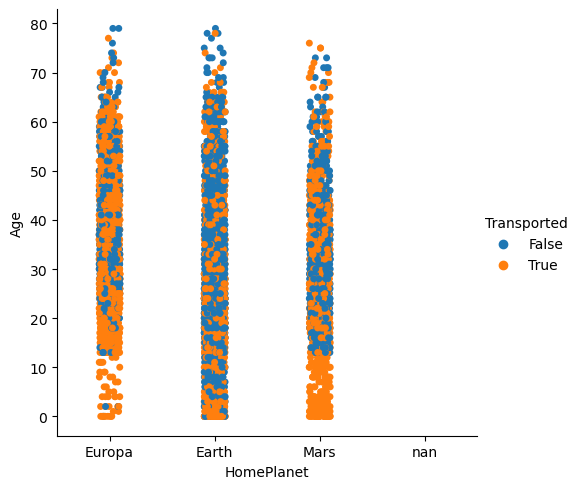

In [13]:
sns.catplot(data=train_data, x='HomePlanet', y='Age', hue='Transported')

По всей видимости дети младше 10 лет с Марса абсолютно все были транспортированы, как и большинство детей с Европы, в отличии от детей с Земли. Попробуем узнать, чем так отличаются эти несколько детей с Европы, которых все таки не транспортировало, от остальных 10летних.

<AxesSubplot:xlabel='Transported', ylabel='Age'>

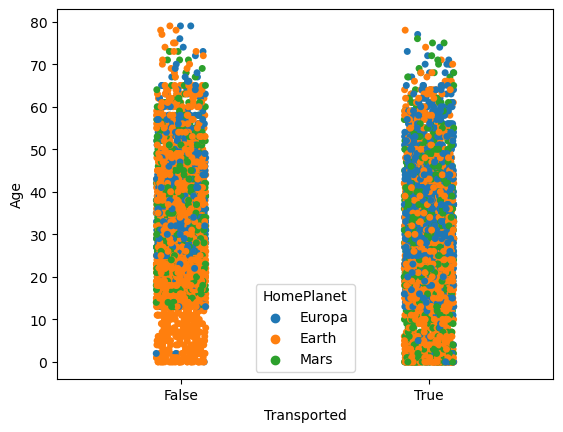

In [46]:
sns.stripplot(data=train_data, x='Transported', y='Age', hue='HomePlanet')

In [14]:
eu_childs_data = train_data[(train_data.HomePlanet == 'Europa') & (train_data.Age < 10.0)]

In [15]:
print('Кол-во записей:', eu_childs_data[eu_childs_data.Transported == False].shape[0])
eu_childs_data[eu_childs_data.Transported == False].nunique()

Кол-во записей: 3


PassengerId     3
HomePlanet      1
CryoSleep       1
Cabin           3
Destination     1
Age             2
VIP             1
RoomService     1
FoodCourt       1
ShoppingMall    1
Spa             1
VRDeck          1
Name            3
Transported     1
dtype: int64

In [16]:
print('Кол-во записей:', eu_childs_data[eu_childs_data.Transported == True].shape[0])
eu_childs_data[eu_childs_data.Transported == True].nunique()

Кол-во записей: 34


PassengerId     34
HomePlanet       1
CryoSleep        2
Cabin           29
Destination      2
Age              9
VIP              1
RoomService      1
FoodCourt        1
ShoppingMall     1
Spa              1
VRDeck           1
Name            33
Transported      1
dtype: int64

Выделим в отдельный столбец стороны бортов, в ккоторых располагаются кабины пассажиров.

In [18]:
cabin_side = []
for el in train_data.Cabin:
    if np.nan_to_num(el) != 0.0:
        cabin_side.append(el[-1])
    else:
        cabin_side.append(np.nan)
    
train_data['CabinSide'] = cabin_side

In [19]:
train_data.CabinSide.value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

В правой стороне корабля на 80 человек больше. Посмотрим, влияет ли это как то на то, транспортированы они или нет.

<AxesSubplot:xlabel='CabinSide', ylabel='Age'>

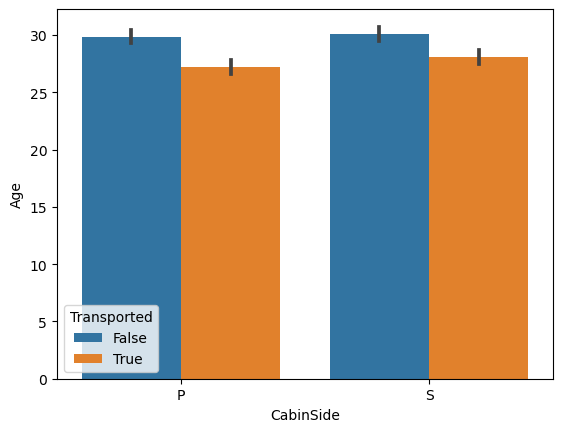

In [20]:
sns.barplot(data=train_data, x='CabinSide', y='Age', hue='Transported')

In [21]:
train_data[train_data.Transported == True].CabinSide.value_counts()

S    2380
P    1898
Name: CabinSide, dtype: int64

In [22]:
train_data[train_data.Transported == False].CabinSide.value_counts()

P    2308
S    1908
Name: CabinSide, dtype: int64

<AxesSubplot:>

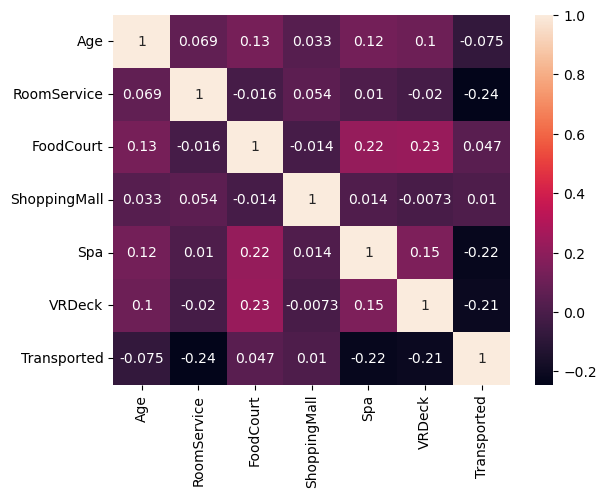

In [23]:
sns.heatmap(train_data.corr(), annot=True)

По матрице корреляций видно, что между суммой, потраченной на фудкорте и суммами, потраченными на СПА/VRПалубу есть небольшая положительная корреляция. Логично, что те пассажиры, которые тратят больше денег на еду, готовы так же больше тратить. и на развлечения. К сожалению, эта информация никак не продвигает нас к цели.
<p>Также, замечена небольшая отрицательная корреляция между доп. тратами на судне (Обслуживание в номере, СПА и VRПалуба) и шансом на телепортацию.</p>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

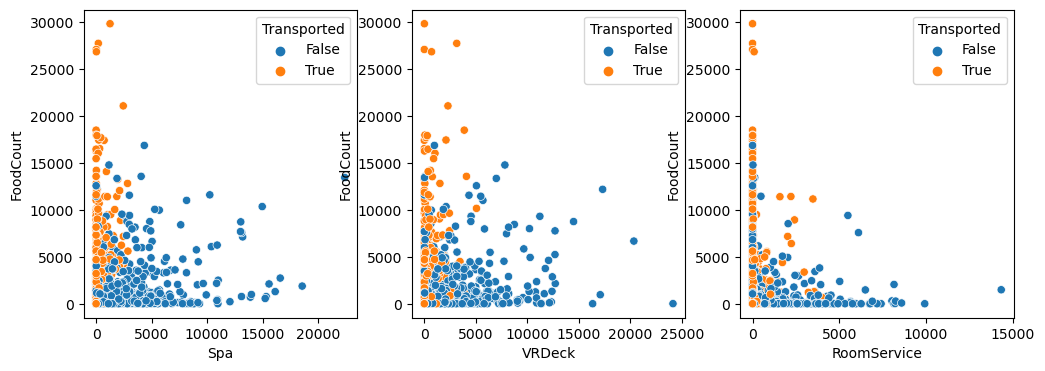

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(ax=axes[0], data=train_data, x='Spa', y='FoodCourt', hue='Transported')
sns.scatterplot(ax=axes[1], data=train_data, x='VRDeck', y='FoodCourt', hue='Transported')
sns.scatterplot(ax=axes[2], data=train_data, x='RoomService', y='FoodCourt', hue='Transported')

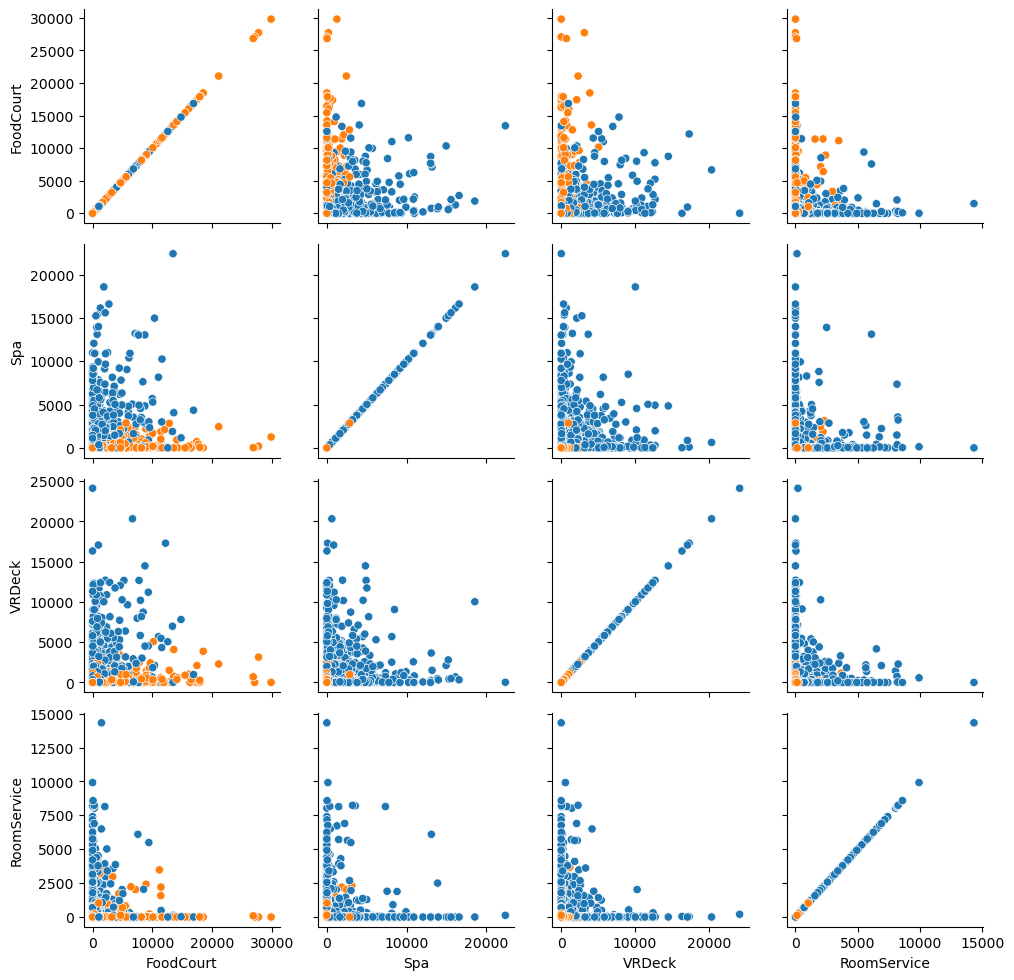

In [25]:
multax = sns.PairGrid(data=train_data.loc[:, ['FoodCourt', 'Spa', 'VRDeck', 'RoomService', 'Transported']], hue='Transported')
multax.map(sns.scatterplot)

In [28]:
sns.jointplot(
    data=train_data,
    x="FoodCourt", y="Spa", hue="Transported",
    kind="hex",
)

ValueError: Use of `hue` with `kind='hex'` is not currently supported.

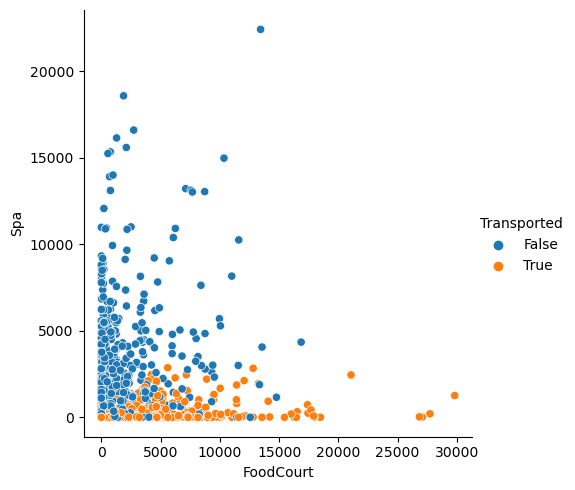

In [29]:
sns.relplot(
    data=train_data,
    x="FoodCourt", y="Spa", hue="Transported")

<AxesSubplot:xlabel='FoodCourt', ylabel='Spa'>

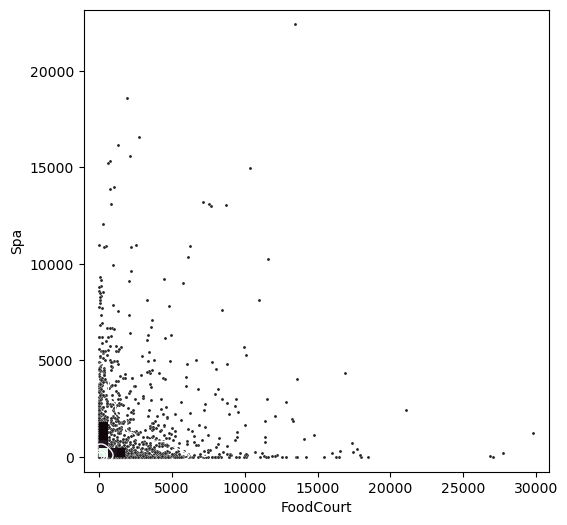

In [30]:
x = train_data.FoodCourt
y = train_data.Spa
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

In [32]:
import plotly.express as px
px.scatter(train_data, x="FoodCourt", y="Spa", color="Transported")

In [33]:
train_data.Spa.describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64